In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import keras

Using TensorFlow backend.


In [ ]:
data_path = '/content/drive/My Drive/azure download/data/vmtable.csv'
headers=['vm id','subscription id','deployment id','vm created', 'vm deleted',
'max cpu', 'avg cpu', 'p95max cpu', 'vm category', 'vm core count', 'vm memory']
vmtable = pd.read_csv(data_path, header=None,
index_col=False,names=headers,delimiter=',')
vmtable.head()

,vm id,subscription id,deployment id,vm created,vm deleted,max cpu,avg cpu,p95max cpu,vm category,vm core count,vm memory
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75


In [ ]:
vmtable['vm lifetime'] = np.maximum((vmtable['vm deleted'] - vmtable['vm created']),300)/ 3600
vmtable['vm core hour'] = vmtable['vm lifetime'] * vmtable['vm core count']
vmtable = vmtable.drop(['vm created','vm deleted','vm core count','vm lifetime'], axis=1, inplace=False)
vmtable.head()

,vm id,subscription id,deployment id,max cpu,avg cpu,p95max cpu,vm category,vm memory,vm core hour
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,99.369869,3.424094,10.194309,Delay-insensitive,1.75,719.916667
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,100.000000,6.181784,33.981360,Interactive,0.75,427.583333
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,99.569027,3.573635,7.924250,Delay-insensitive,1.75,111.916667
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,99.405085,16.287611,95.697890,Delay-insensitive,56.00,5759.333333
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,98.967961,3.036038,9.445484,Delay-insensitive,1.75,607.916667


In [ ]:
vmtable.isnull().values.any()

False

In [ ]:
def plot_corr(df,size=10):

  import seaborn as sn
  corr = df.corr()
  sn.heatmap(corr,annot=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


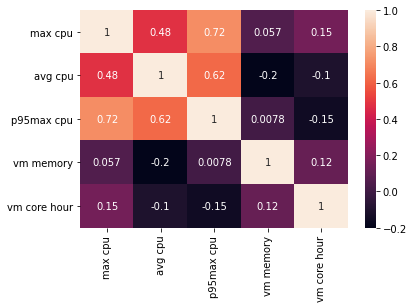

In [ ]:
import seaborn as sn
corr=vmtable.corr()
sn.heatmap(corr,annot=True)
plt.savefig('/content/drive/My Drive/azure download/data/corr plot before.png', dpi = 300)
plt.show()

In [ ]:
vmtable['vm category'].unique()

array(['Delay-insensitive', 'Interactive', 'Unkown'], dtype=object)

In [ ]:
vmtable.count()

vm id              2013767
subscription id    2013767
deployment id      2013767
max cpu            2013767
avg cpu            2013767
p95max cpu         2013767
vm category        2013767
vm memory          2013767
vm core hour       2013767
dtype: int64

In [ ]:
vmtable[vmtable['vm category']=='Interactive'].count()

vm id              60682
subscription id    60682
deployment id      60682
max cpu            60682
avg cpu            60682
p95max cpu         60682
vm category        60682
vm memory          60682
vm core hour       60682
dtype: int64

In [ ]:
vmtable[vmtable['vm category']=='Delay-insensitive'].count()

vm id              780488
subscription id    780488
deployment id      780488
max cpu            780488
avg cpu            780488
p95max cpu         780488
vm category        780488
vm memory          780488
vm core hour       780488
dtype: int64

In [ ]:
vmtable[(vmtable['vm category']!='Interactive') & (vmtable['vm category']!='Delay-insensitive')].count()

vm id              1172597
subscription id    1172597
deployment id      1172597
max cpu            1172597
avg cpu            1172597
p95max cpu         1172597
vm category        1172597
vm memory          1172597
vm core hour       1172597
dtype: int64

In [ ]:
vm_category = {'Delay-insensitive':0,'Interactive':1,'Unkown':np.nan}
vmtable['vm category'] = vmtable['vm category'].map(vm_category)

In [ ]:
vmtable = vmtable.dropna()
vmtable.count()

vm id              841170
subscription id    841170
deployment id      841170
max cpu            841170
avg cpu            841170
p95max cpu         841170
vm category        841170
vm memory          841170
vm core hour       841170
dtype: int64

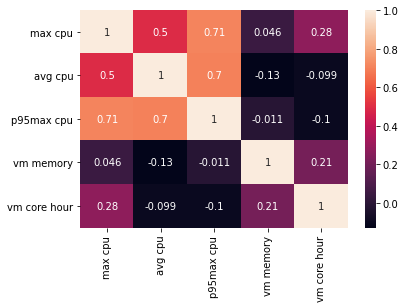

In [ ]:
vmtable2=vmtable.drop(['vm category'], axis=1, inplace=False)
corr=vmtable2.corr()
sn.heatmap(corr,annot=True)
plt.savefig('/content/drive/My Drive/azure download/data/corr plot after.png')
plt.show()